In [57]:
import keras as ks, tensorflow as tf, numpy as np
import matplotlib.pyplot as plt

In [75]:
@tf.function
def DynamicRate(loss):
    return tf.experimental.numpy.log10(loss*10.0) / 100.0 #*unsure about those 10s at the end

class DRMSprop(ks.optimizers.RMSprop):
    def __init__(self, learning_rate=0.001, rho=0.9, momentum=0, epsilon=1e-7, centered=False, weight_decay=None, clipnorm=None, clipvalue=None, global_clipnorm=None, use_ema=False, ema_momentum=0.99, ema_overwrite_frequency=None, loss_scale_factor=None, gradient_accumulation_steps=None, name="rmsprop", **kwargs):
        super().__init__(learning_rate, rho, momentum, epsilon, centered, weight_decay, clipnorm, clipvalue, global_clipnorm, use_ema, ema_momentum, ema_overwrite_frequency, loss_scale_factor, gradient_accumulation_steps, name, **kwargs)
    def scale_loss(self, loss):
        self.learning_rate = DynamicRate(loss)
        #*against, only to track rate
        LR_Track.append(self.learning_rate.numpy())
        return super().scale_loss(loss)

In [70]:
LR_Track = []
#*DynamicRMSprop start from 0.0 rate
DRMSprop_ = DRMSprop(0.0)
RMSprop_ = ks.optimizers.RMSprop(0.1)
Adam_ = ks.optimizers.Adam(0.1)
(x_train, y_train), (x_test, y_test) = ks.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

In [71]:
inputs = ks.Input(shape=(784,))
dense = ks.layers.Dense(64, activation="relu")
x = dense(inputs)
x = ks.layers.Dense(64, activation="relu")(x)
outputs = ks.layers.Dense(10)(x)
mdl = ks.Model(inputs=inputs, outputs=outputs, name="mnist_model")

mdl.compile(
    loss=ks.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=DRMSprop_,
    metrics=[ks.metrics.SparseCategoricalAccuracy()],
    run_eagerly=True
)


In [63]:
history_Adam = mdl.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.6176 - sparse_categorical_accuracy: 0.5602 - val_loss: 0.8680 - val_sparse_categorical_accuracy: 0.6993
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.0282 - sparse_categorical_accuracy: 0.6342 - val_loss: 1.2335 - val_sparse_categorical_accuracy: 0.5082
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.4454 - sparse_categorical_accuracy: 0.4768 - val_loss: 1.3529 - val_sparse_categorical_accuracy: 0.4072
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.4094 - sparse_categorical_accuracy: 0.4397 - val_loss: 1.6916 - val_sparse_categorical_accuracy: 0.3480
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.7109 - sparse_categorical_accuracy: 0.3372 - val_loss: 1.4207 - val_sparse_categorical_accuracy: 0.4117
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.5464 - sparse_categorical_accuracy: 0.3953 - val_loss: 1.3801 - val_sparse_categorical_accuracy: 0.4540
Epoc

In [66]:
history_RMSprop = mdl.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.7819 - sparse_categorical_accuracy: 0.2992 - val_loss: 1.6193 - val_sparse_categorical_accuracy: 0.2837
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 972us/step - loss: 1.7271 - sparse_categorical_accuracy: 0.2942 - val_loss: 1.5616 - val_sparse_categorical_accuracy: 0.2894
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.6204 - sparse_categorical_accuracy: 0.2951 - val_loss: 1.5978 - val_sparse_categorical_accuracy: 0.2858
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 998us/step - loss: 1.7008 - sparse_categorical_accuracy: 0.2974 - val_loss: 1.5922 - val_sparse_categorical_accuracy: 0.2917
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 953us/step - loss: 1.6328 - sparse_categorical_accuracy: 0.2999 - val_loss: 1.7713 - val_sparse_categorical_accuracy: 0.2944
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.6530 - sparse_categorical_accuracy: 0.2971 - val_loss: 1.6181 - val_sparse_categorical_accuracy: 0.292

In [72]:
history_DRMSprop = mdl.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - loss: 0.5556 - sparse_categorical_accuracy: 0.8314 - val_loss: 0.1632 - val_sparse_categorical_accuracy: 0.9510
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - loss: 0.1613 - sparse_categorical_accuracy: 0.9514 - val_loss: 0.1518 - val_sparse_categorical_accuracy: 0.9550
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - loss: 0.1392 - sparse_categorical_accuracy: 0.9582 - val_loss: 0.1552 - val_sparse_categorical_accuracy: 0.9547
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - loss: 0.1257 - sparse_categorical_accuracy: 0.9622 - val_loss: 0.1348 - val_sparse_categorical_accuracy: 0.9617
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - loss: 0.1229 - sparse_categorical_accuracy: 0.9614 - val_loss: 0.1333 - val_sparse_categorical_accuracy: 0.9617
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - loss: 0.1180 - sparse_categorical_accuracy: 0.9638 - val_loss: 0.1764 - val_sparse_categorical_accuracy:

In [73]:
mdl.evaluate(x_test, y_test) #*evaluation for DRMSprop

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1558 - sparse_categorical_accuracy: 0.9519


[0.13612620532512665, 0.9578999876976013]

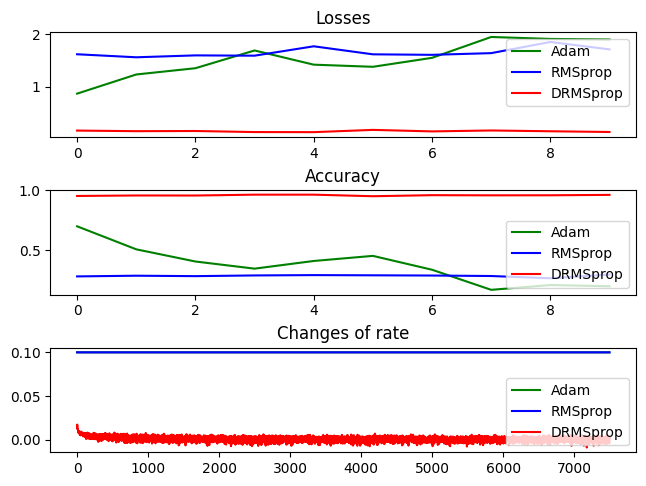

In [74]:
val_loss_Adam = history_Adam.history["val_loss"]
val_accuracy_Adam = history_Adam.history["val_sparse_categorical_accuracy"]

val_loss_RMSprop = history_RMSprop.history["val_loss"]
val_accuracy_RMSprop = history_RMSprop.history["val_sparse_categorical_accuracy"]

val_loss_DRMSprop = history_DRMSprop.history["val_loss"]
val_accuracy_DRMSprop = history_DRMSprop.history["val_sparse_categorical_accuracy"]

fig, axis = plt.subplots(3)
axis[0].plot(range(10), val_loss_Adam, color="green")
axis[0].plot(range(10), val_loss_RMSprop, color="blue")
axis[0].plot(range(10), val_loss_DRMSprop, color="red")
axis[0].legend(["Adam", "RMSprop", "DRMSprop"], loc="upper right")
axis[0].set_title("Losses")
axis[1].plot(range(10), val_accuracy_Adam, color="green")
axis[1].plot(range(10), val_accuracy_RMSprop, color="blue")
axis[1].plot(range(10), val_accuracy_DRMSprop, color="red")
axis[1].legend(["Adam", "RMSprop", "DRMSprop"], loc="lower right")
axis[1].set_title("Accuracy")
axis[2].plot(range(7500), [0.1]*7500, color="green")
axis[2].plot(range(7500), [0.1]*7500, color="blue")
axis[2].plot(range(7500), LR_Track, color="red")
axis[2].legend(["Adam", "RMSprop", "DRMSprop"], loc="lower right")
axis[2].set_title("Changes of rate")
fig.tight_layout(pad=0.5)
plt.show()